In [32]:
import pandas as pd
import matplotlib as plt
import tensorflow as tf

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

train = pd.read_csv('full_hdb_perSqm_train_f34.csv').drop(['Unnamed: 0'], axis = 1)
test = pd.read_csv('full_hdb_perSqm_test_f34.csv').drop(['Unnamed: 0'], axis = 1)

train

,lat,minPrimary_transitTime,min_dis,remaining_lease,DBSS,Improved,Model A,New Generation,Type S1,Type S2,...,BUKIT MERAH,CENTRAL AREA,CHOA CHU KANG,CLEMENTI,JURONG WEST,KALLANG/WHAMPOA,QUEENSTOWN,WOODLANDS,YISHUN,resale_price_per_sqm
0,1.377567,759.0,0.001040,93.166667,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,6410.714286
1,1.371036,368.0,0.018341,60.833333,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,5186.813187
2,1.430421,964.0,0.005845,71.083333,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,5335.365854
3,1.352865,448.0,0.009913,94.833333,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,6691.176471
4,1.371233,454.0,0.005618,61.000000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,5476.190476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13806,1.341138,514.0,0.003085,48.833333,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,4908.045977
13807,1.329478,868.0,0.006544,57.083333,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,5176.470588
13808,1.389799,254.0,0.002423,91.833333,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,6246.107527
13809,1.338132,397.0,0.004211,76.416667,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,5709.090909


In [3]:
train.shape

(13811, 34)

array([[<AxesSubplot:title={'center':'resale_price_per_sqm'}>]],
      dtype=object)

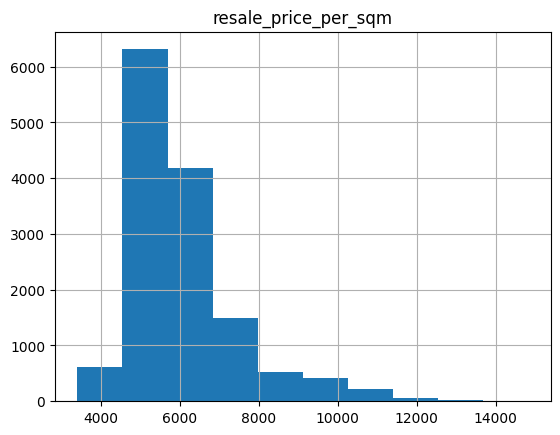

In [4]:
train.hist('resale_price_per_sqm')

In [5]:
train.isna().sum()

lat                       0
minPrimary_transitTime    0
min_dis                   0
remaining_lease           0
DBSS                      0
Improved                  0
Model A                   0
New Generation            0
Type S1                   0
Type S2                   0
2 ROOM                    0
01 TO 03                  0
04 TO 06                  0
16 TO 18                  0
19 TO 21                  0
22 TO 24                  0
25 TO 27                  0
28 TO 30                  0
31 TO 33                  0
34 TO 36                  0
37 TO 39                  0
40 TO 42                  0
43 TO 45                  0
BISHAN                    0
BUKIT MERAH               0
CENTRAL AREA              0
CHOA CHU KANG             0
CLEMENTI                  0
JURONG WEST               0
KALLANG/WHAMPOA           0
QUEENSTOWN                0
WOODLANDS                 0
YISHUN                    0
resale_price_per_sqm      0
dtype: int64

In [6]:
para_dict = {
    'hidden_units' : [7, 8, 9],
    'batch_size' : [16, 32, 64],
    'learning_rate' : [[0.008, 0.01], [0.0008, 0.001]]
}

def create_model(columns, units = 8, activation = 'relu', loss = 'mae', optimizer = 'SGD', metrics = 'mae'):
    
    model = Sequential([
        Dense(units, input_shape = (len(columns), ), activation = activation),
        Dense(1, activation = activation)
    ])

    model.compile(
        optimizer = optimizer,
        loss = loss,
        metrics = metrics
    )

    return model


In [7]:
'''
Model 34
'''

# train set
y_train = train['resale_price_per_sqm']
x_train = train.drop(['resale_price_per_sqm'], axis = 1)

# test set
y_test = test['resale_price_per_sqm']
x_test = test.drop(['resale_price_per_sqm'], axis = 1).astype(float)

x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13811 entries, 0 to 13810
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   lat                     13811 non-null  float64
 1   minPrimary_transitTime  13811 non-null  float64
 2   min_dis                 13811 non-null  float64
 3   remaining_lease         13811 non-null  float64
 4   DBSS                    13811 non-null  bool   
 5   Improved                13811 non-null  bool   
 6   Model A                 13811 non-null  bool   
 7   New Generation          13811 non-null  bool   
 8   Type S1                 13811 non-null  bool   
 9   Type S2                 13811 non-null  bool   
 10  2 ROOM                  13811 non-null  bool   
 11  01 TO 03                13811 non-null  bool   
 12  04 TO 06                13811 non-null  bool   
 13  16 TO 18                13811 non-null  bool   
 14  19 TO 21                13811 non-null

In [8]:
scaler = StandardScaler()

x_columns = list(train.columns)
x_columns.remove('resale_price_per_sqm')

x_train = scaler.fit_transform(x_train)

x_train = pd.DataFrame(x_train, columns = x_columns)

x_test = scaler.fit_transform(x_test)

x_test = pd.DataFrame(x_test, columns = x_columns)

x_train

,lat,minPrimary_transitTime,min_dis,remaining_lease,DBSS,Improved,Model A,New Generation,Type S1,Type S2,...,BISHAN,BUKIT MERAH,CENTRAL AREA,CHOA CHU KANG,CLEMENTI,JURONG WEST,KALLANG/WHAMPOA,QUEENSTOWN,WOODLANDS,YISHUN
0,0.156048,-0.026266,-1.299018,1.261190,-0.113286,1.800836,-0.816201,-0.360699,-0.039943,-0.022519,...,-0.121219,-0.198981,-0.082337,4.855382,-0.145157,-0.253995,-0.18119,-0.159825,-0.305932,-0.278484
1,0.007990,-1.229159,3.027768,-0.878525,-0.113286,-0.555298,-0.816201,2.772393,-0.039943,-0.022519,...,-0.121219,-0.198981,-0.082337,-0.205957,-0.145157,-0.253995,-0.18119,-0.159825,-0.305932,-0.278484
2,1.354411,0.604407,-0.097186,-0.200213,-0.113286,-0.555298,-0.816201,-0.360699,-0.039943,-0.022519,...,-0.121219,-0.198981,-0.082337,-0.205957,-0.145157,-0.253995,-0.18119,-0.159825,3.268705,-0.278484
3,-0.404001,-0.983043,0.920124,1.371485,-0.113286,-0.555298,1.225188,-0.360699,-0.039943,-0.022519,...,-0.121219,-0.198981,-0.082337,-0.205957,-0.145157,-0.253995,-0.18119,-0.159825,-0.305932,-0.278484
4,0.012449,-0.964584,-0.154118,-0.867495,-0.113286,-0.555298,-0.816201,-0.360699,-0.039943,-0.022519,...,-0.121219,-0.198981,-0.082337,-0.205957,-0.145157,-0.253995,-0.18119,-0.159825,-0.305932,-0.278484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13806,-0.669887,-0.779997,-0.787476,-1.672645,-0.113286,1.800836,-0.816201,-0.360699,-0.039943,-0.022519,...,-0.121219,-0.198981,-0.082337,-0.205957,-0.145157,-0.253995,-0.18119,-0.159825,-0.305932,-0.278484
13807,-0.934243,0.309068,0.077641,-1.126687,-0.113286,-0.555298,-0.816201,2.772393,-0.039943,-0.022519,...,-0.121219,-0.198981,-0.082337,-0.205957,-0.145157,-0.253995,-0.18119,-0.159825,-0.305932,-0.278484
13808,0.433403,-1.579874,-0.953137,1.172955,-0.113286,-0.555298,1.225188,-0.360699,-0.039943,-0.022519,...,-0.121219,-0.198981,-0.082337,-0.205957,-0.145157,-0.253995,-0.18119,-0.159825,-0.305932,-0.278484
13809,-0.738033,-1.139942,-0.505835,0.152730,-0.113286,1.800836,-0.816201,-0.360699,-0.039943,-0.022519,...,-0.121219,-0.198981,-0.082337,-0.205957,-0.145157,3.937080,-0.18119,-0.159825,-0.305932,-0.278484


In [9]:
# MBGD - mae + sgd

result34_dict = {
    'units': [],
    'batch_size': [],
    'learning_rate': [],
    'minimum_mae_error': []
}

for units in para_dict['hidden_units']:
    for b_size in para_dict['batch_size']:
        for rate in para_dict['learning_rate'][0]:

            early_stopping = EarlyStopping(monitor = 'val_loss',
                               patience = 10,
                               restore_best_weights = True)

            optimizer = SGD(learning_rate = rate)

            model = create_model(columns = x_columns, units = units, optimizer = optimizer)

            best_model = model.fit(
                x_train, y_train,
                validation_data = (x_test, y_test),
                batch_size = b_size,
                epochs = 250,
                callbacks = [early_stopping]
            )

            min_mae = early_stopping.best

            result34_dict['units'].append(units)
            result34_dict['batch_size'].append(b_size)
            result34_dict['learning_rate'].append(rate)
            result34_dict['minimum_mae_error'].append(min_mae)



Epoch 1/250
864/864 [==============================] - 2s 2ms/step - loss: 4139.4106 - mae: 4139.4106 - val_loss: 525.4608 - val_mae: 525.4608
Epoch 2/250
864/864 [==============================] - 2s 2ms/step - loss: 515.5820 - mae: 515.5820 - val_loss: 509.5664 - val_mae: 509.5664
Epoch 3/250
864/864 [==============================] - 2s 3ms/step - loss: 489.2473 - mae: 489.2473 - val_loss: 482.0092 - val_mae: 482.0092
Epoch 4/250
864/864 [==============================] - 2s 2ms/step - loss: 471.3762 - mae: 471.3762 - val_loss: 473.6479 - val_mae: 473.6479
Epoch 5/250
864/864 [==============================] - 2s 2ms/step - loss: 458.3053 - mae: 458.3053 - val_loss: 479.1013 - val_mae: 479.1013
Epoch 6/250
864/864 [==============================] - 2s 2ms/step - loss: 450.7209 - mae: 450.7209 - val_loss: 457.3479 - val_mae: 457.3479
Epoch 7/250
864/864 [==============================] - 2s 2ms/step - loss: 441.7387 - mae: 441.7387 - val_loss: 451.5699 - val_mae: 451.5699
Epoch 8/250

In [10]:
result34_sgd_df = pd.DataFrame(result34_dict)

result34_sgd_df.to_csv('result34_sgd.csv')

result34_sgd_df

,units,batch_size,learning_rate,minimum_mae_error
0,7,16,0.008,404.279297
1,7,16,0.010,396.241150
2,7,32,0.008,409.937469
3,7,32,0.010,395.671204
4,7,64,0.008,410.216339
5,7,64,0.010,411.039459
6,8,16,0.008,411.396545
7,8,16,0.010,408.973145
8,8,32,0.008,395.748810
9,8,32,0.010,394.802124


In [11]:
# MBGD - mse + adam

result34_adam_dict = {
    'units': [],
    'batch_size': [],
    'learning_rate': [],
    'minimum_mae_error': []
}

for units in para_dict['hidden_units']:
    for b_size in para_dict['batch_size']:
        for rate in para_dict['learning_rate'][0]:

            early_stopping = EarlyStopping(monitor = 'val_mae',
                               patience = 10,
                               restore_best_weights = True)

            optimizer = Adam(learning_rate = rate)

            model = create_model(columns = x_columns, units = units, loss = 'mse', optimizer = optimizer)

            best_model = model.fit(
                x_train, y_train,
                validation_data = (x_test, y_test),
                batch_size = b_size,
                epochs = 250,
                callbacks = [early_stopping]
            )

            min_mae = early_stopping.best

            result34_adam_dict['units'].append(units)
            result34_adam_dict['batch_size'].append(b_size)
            result34_adam_dict['learning_rate'].append(rate)
            result34_adam_dict['minimum_mae_error'].append(min_mae)

Epoch 1/250
864/864 [==============================] - 3s 2ms/step - loss: 33110492.0000 - mae: 5601.7036 - val_loss: 23047608.0000 - val_mae: 4679.1060
Epoch 2/250
864/864 [==============================] - 2s 2ms/step - loss: 13786377.0000 - mae: 3399.6885 - val_loss: 6947805.5000 - val_mae: 2209.1384
Epoch 3/250
864/864 [==============================] - 2s 2ms/step - loss: 4022923.2500 - mae: 1492.8394 - val_loss: 2210352.7500 - val_mae: 1018.3155
Epoch 4/250
864/864 [==============================] - 2s 2ms/step - loss: 1566429.7500 - mae: 859.0269 - val_loss: 1158334.5000 - val_mae: 755.7100
Epoch 5/250
864/864 [==============================] - 2s 3ms/step - loss: 974296.9375 - mae: 701.4128 - val_loss: 830775.0625 - val_mae: 652.3266
Epoch 6/250
864/864 [==============================] - 2s 2ms/step - loss: 743593.1875 - mae: 620.5467 - val_loss: 664161.0625 - val_mae: 590.4376
Epoch 7/250
864/864 [==============================] - 2s 2ms/step - loss: 621445.1250 - mae: 573.576

In [12]:
result34_adam_df = pd.DataFrame(result34_adam_dict)

result34_adam_df.to_csv('result34_adam.csv')

result34_adam_df

,units,batch_size,learning_rate,minimum_mae_error
0,7,16,0.008,408.229248
1,7,16,0.010,414.667053
2,7,32,0.008,412.822906
3,7,32,0.010,418.612244
4,7,64,0.008,428.128174
5,7,64,0.010,420.930450
6,8,16,0.008,414.882843
7,8,16,0.010,426.731384
8,8,32,0.008,409.880554
9,8,32,0.010,406.201569


In [13]:
'''
Model 6
'''

train = pd.read_csv('full_hdb_perSqm_train_f16.csv').drop(['Unnamed: 0'], axis = 1)
test = pd.read_csv('full_hdb_perSqm_test_f16.csv').drop(['Unnamed: 0'], axis = 1)

train

,lat,remaining_lease,DBSS,Model A,New Generation,Type S1,01 TO 03,22 TO 24,25 TO 27,28 TO 30,34 TO 36,BUKIT MERAH,CENTRAL AREA,QUEENSTOWN,WOODLANDS,resale_price_per_sqm
0,1.377567,93.166667,False,False,False,False,False,False,False,False,False,False,False,False,False,6410.714286
1,1.371036,60.833333,False,False,True,False,True,False,False,False,False,False,False,False,False,5186.813187
2,1.430421,71.083333,False,False,False,False,False,False,False,False,False,False,False,False,True,5335.365854
3,1.352865,94.833333,False,True,False,False,False,False,False,False,False,False,False,False,False,6691.176471
4,1.371233,61.000000,False,False,False,False,False,False,False,False,False,False,False,False,False,5476.190476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13806,1.341138,48.833333,False,False,False,False,True,False,False,False,False,False,False,False,False,4908.045977
13807,1.329478,57.083333,False,False,True,False,False,False,False,False,False,False,False,False,False,5176.470588
13808,1.389799,91.833333,False,True,False,False,False,False,False,False,False,False,False,False,False,6246.107527
13809,1.338132,76.416667,False,False,False,False,False,False,False,False,False,False,False,False,False,5709.090909


In [14]:
# train set
y_train = train['resale_price_per_sqm']
x_train = train.drop(['resale_price_per_sqm'], axis = 1)

# test set
y_test = test['resale_price_per_sqm']
x_test = test.drop(['resale_price_per_sqm'], axis = 1).astype(float)

x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13811 entries, 0 to 13810
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lat              13811 non-null  float64
 1   remaining_lease  13811 non-null  float64
 2   DBSS             13811 non-null  bool   
 3   Model A          13811 non-null  bool   
 4   New Generation   13811 non-null  bool   
 5   Type S1          13811 non-null  bool   
 6   01 TO 03         13811 non-null  bool   
 7   22 TO 24         13811 non-null  bool   
 8   25 TO 27         13811 non-null  bool   
 9   28 TO 30         13811 non-null  bool   
 10  34 TO 36         13811 non-null  bool   
 11  BUKIT MERAH      13811 non-null  bool   
 12  CENTRAL AREA     13811 non-null  bool   
 13  QUEENSTOWN       13811 non-null  bool   
 14  WOODLANDS        13811 non-null  bool   
dtypes: bool(13), float64(2)
memory usage: 391.3 KB


In [15]:
scaler = StandardScaler()

x_columns = list(train.columns)
x_columns.remove('resale_price_per_sqm')

x_train = scaler.fit_transform(x_train)

x_train = pd.DataFrame(x_train, columns = x_columns)

x_test = scaler.fit_transform(x_test)

x_test = pd.DataFrame(x_test, columns = x_columns)

x_train

,lat,remaining_lease,DBSS,Model A,New Generation,Type S1,01 TO 03,22 TO 24,25 TO 27,28 TO 30,34 TO 36,BUKIT MERAH,CENTRAL AREA,QUEENSTOWN,WOODLANDS
0,0.156048,1.261190,-0.113286,-0.816201,-0.360699,-0.039943,-0.450726,-0.115237,-0.100095,-0.076808,-0.057808,-0.198981,-0.082337,-0.159825,-0.305932
1,0.007990,-0.878525,-0.113286,-0.816201,2.772393,-0.039943,2.218645,-0.115237,-0.100095,-0.076808,-0.057808,-0.198981,-0.082337,-0.159825,-0.305932
2,1.354411,-0.200213,-0.113286,-0.816201,-0.360699,-0.039943,-0.450726,-0.115237,-0.100095,-0.076808,-0.057808,-0.198981,-0.082337,-0.159825,3.268705
3,-0.404001,1.371485,-0.113286,1.225188,-0.360699,-0.039943,-0.450726,-0.115237,-0.100095,-0.076808,-0.057808,-0.198981,-0.082337,-0.159825,-0.305932
4,0.012449,-0.867495,-0.113286,-0.816201,-0.360699,-0.039943,-0.450726,-0.115237,-0.100095,-0.076808,-0.057808,-0.198981,-0.082337,-0.159825,-0.305932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13806,-0.669887,-1.672645,-0.113286,-0.816201,-0.360699,-0.039943,2.218645,-0.115237,-0.100095,-0.076808,-0.057808,-0.198981,-0.082337,-0.159825,-0.305932
13807,-0.934243,-1.126687,-0.113286,-0.816201,2.772393,-0.039943,-0.450726,-0.115237,-0.100095,-0.076808,-0.057808,-0.198981,-0.082337,-0.159825,-0.305932
13808,0.433403,1.172955,-0.113286,1.225188,-0.360699,-0.039943,-0.450726,-0.115237,-0.100095,-0.076808,-0.057808,-0.198981,-0.082337,-0.159825,-0.305932
13809,-0.738033,0.152730,-0.113286,-0.816201,-0.360699,-0.039943,-0.450726,-0.115237,-0.100095,-0.076808,-0.057808,-0.198981,-0.082337,-0.159825,-0.305932


In [16]:
# MBGD - mae + sgd

result16_sgd_dict = {
    'units': [],
    'batch_size': [],
    'learning_rate': [],
    'minimum_mae_error': []
}

for units in para_dict['hidden_units']:
    for b_size in para_dict['batch_size']:
        for rate in para_dict['learning_rate'][0]:

            early_stopping = EarlyStopping(monitor = 'val_loss',
                               patience = 10,
                               restore_best_weights = True)

            optimizer = SGD(learning_rate = rate)

            model = create_model(columns = x_columns, units = units, optimizer = optimizer)

            best_model = model.fit(
                x_train, y_train,
                validation_data = (x_test, y_test),
                batch_size = b_size,
                epochs = 250,
                callbacks = [early_stopping]
            )

            min_mae = early_stopping.best

            result16_sgd_dict['units'].append(units)
            result16_sgd_dict['batch_size'].append(b_size)
            result16_sgd_dict['learning_rate'].append(rate)
            result16_sgd_dict['minimum_mae_error'].append(min_mae)


Epoch 1/250
864/864 [==============================] - 2s 2ms/step - loss: 4258.7407 - mae: 4258.7407 - val_loss: 623.5948 - val_mae: 623.5948
Epoch 2/250
864/864 [==============================] - 2s 2ms/step - loss: 614.2745 - mae: 614.2745 - val_loss: 632.7156 - val_mae: 632.7156
Epoch 3/250
864/864 [==============================] - 2s 2ms/step - loss: 610.3431 - mae: 610.3431 - val_loss: 611.3502 - val_mae: 611.3502
Epoch 4/250
864/864 [==============================] - 2s 2ms/step - loss: 604.3668 - mae: 604.3668 - val_loss: 607.3942 - val_mae: 607.3942
Epoch 5/250
864/864 [==============================] - 2s 2ms/step - loss: 595.8400 - mae: 595.8400 - val_loss: 587.9836 - val_mae: 587.9836
Epoch 6/250
864/864 [==============================] - 2s 2ms/step - loss: 581.7444 - mae: 581.7444 - val_loss: 568.5511 - val_mae: 568.5511
Epoch 7/250
864/864 [==============================] - 2s 2ms/step - loss: 567.0915 - mae: 567.0915 - val_loss: 566.2225 - val_mae: 566.2225
Epoch 8/250

In [17]:
result16_sgd_df = pd.DataFrame(result16_sgd_dict)

result16_sgd_df.to_csv('result16_sgd.csv')

result16_sgd_df

,units,batch_size,learning_rate,minimum_mae_error
0,7,16,0.008,525.085815
1,7,16,0.010,523.807922
2,7,32,0.008,540.858398
3,7,32,0.010,526.157349
4,7,64,0.008,529.977234
5,7,64,0.010,528.292419
6,8,16,0.008,542.027832
7,8,16,0.010,523.814514
8,8,32,0.008,532.963989
9,8,32,0.010,540.326721


In [18]:
# MBGD - mse + adam

result16_adam_dict = {
    'units': [],
    'batch_size': [],
    'learning_rate': [],
    'minimum_mae_error': []
}

for units in para_dict['hidden_units']:
    for b_size in para_dict['batch_size']:
        for rate in para_dict['learning_rate'][0]:

            early_stopping = EarlyStopping(monitor = 'val_mae',
                               patience = 10,
                               restore_best_weights = True)

            optimizer = Adam(learning_rate = rate)

            model = create_model(columns = x_columns, units = units, loss = 'mse', optimizer = optimizer)

            best_model = model.fit(
                x_train, y_train,
                validation_data = (x_test, y_test),
                batch_size = b_size,
                epochs = 250,
                callbacks = [early_stopping]
            )

            min_mae = early_stopping.best

            result16_adam_dict['units'].append(units)
            result16_adam_dict['batch_size'].append(b_size)
            result16_adam_dict['learning_rate'].append(rate)
            result16_adam_dict['minimum_mae_error'].append(min_mae)

Epoch 1/250
864/864 [==============================] - 3s 3ms/step - loss: 33516648.0000 - mae: 5618.7324 - val_loss: 24379746.0000 - val_mae: 4775.1348
Epoch 2/250
864/864 [==============================] - 2s 2ms/step - loss: 14430943.0000 - mae: 3501.7444 - val_loss: 6618073.5000 - val_mae: 2206.7776
Epoch 3/250
864/864 [==============================] - 2s 2ms/step - loss: 3618969.5000 - mae: 1375.7642 - val_loss: 2113294.2500 - val_mae: 897.4286
Epoch 4/250
864/864 [==============================] - 2s 2ms/step - loss: 1817602.2500 - mae: 795.2473 - val_loss: 1654224.2500 - val_mae: 740.9238
Epoch 5/250
864/864 [==============================] - 2s 2ms/step - loss: 1588606.1250 - mae: 722.1716 - val_loss: 1533608.3750 - val_mae: 707.0337
Epoch 6/250
864/864 [==============================] - 2s 2ms/step - loss: 1500883.0000 - mae: 703.2123 - val_loss: 1466499.8750 - val_mae: 698.8793
Epoch 7/250
864/864 [==============================] - 2s 2ms/step - loss: 1439151.7500 - mae: 694

In [19]:
result16_adam_df = pd.DataFrame(result16_adam_dict)

result16_adam_df.to_csv('result16_adam.csv')

result16_adam_df

,units,batch_size,learning_rate,minimum_mae_error
0,7,16,0.008,605.518738
1,7,16,0.010,547.732910
2,7,32,0.008,549.478882
3,7,32,0.010,530.639160
4,7,64,0.008,536.969604
5,7,64,0.010,568.684448
6,8,16,0.008,552.380005
7,8,16,0.010,542.173035
8,8,32,0.008,538.955261
9,8,32,0.010,554.738281


### Store the best model

In [44]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

# read data with 33 features
train = pd.read_csv('full_hdb_perSqm_train_f34.csv').drop(['Unnamed: 0'], axis = 1)
test = pd.read_csv('full_hdb_perSqm_test_f34.csv').drop(['Unnamed: 0'], axis = 1)

# train set
y_train = train['resale_price_per_sqm']
x_train = train.drop(['resale_price_per_sqm'], axis = 1)

# test set
y_test = test['resale_price_per_sqm']
x_test = test.drop(['resale_price_per_sqm'], axis = 1).astype(float)

# standardization
scaler = StandardScaler()

x_columns = list(train.columns)
x_columns.remove('resale_price_per_sqm')

x_train = scaler.fit_transform(x_train)

x_train = pd.DataFrame(x_train, columns = x_columns)

x_test = scaler.fit_transform(x_test)

x_test = pd.DataFrame(x_test, columns = x_columns)

'''
create best NN models with selected parameters
'''
def create_best_model(columns = x_columns, units = 8, activation = 'relu', loss = 'mae', metrics = 'mae'):
    
    model = Sequential([
        Dense(units, input_shape = (len(columns), ), activation = activation),
        Dense(1, activation = activation)
    ])

    optimizer = optimizer = SGD(learning_rate = 0.01)

    model.compile(
        optimizer = optimizer,
        loss = loss,
        metrics = metrics
    )

    return model

model = create_best_model()

model.summary()

Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_154 (Dense)           (None, 8)                 272       
                                                                 
 dense_155 (Dense)           (None, 1)                 9         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
checkpoint = ModelCheckpoint("best_model.h5", save_best_only = True)

model = model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    batch_size = 32,
    epochs = 500,
    callbacks = [checkpoint]
)

best_model = load_model("best_model.h5")

Epoch 1/500
432/432 [==============================] - 2s 3ms/step - loss: 6038.3887 - mae: 6038.3887 - val_loss: 5925.5220 - val_mae: 5925.5220
Epoch 2/500
109/432 [======>.......................] - ETA: 0s - loss: 5651.5283 - mae: 5651.5283

C:\Users\94220\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


432/432 [==============================] - 1s 2ms/step - loss: 2529.6265 - mae: 2529.6265 - val_loss: 514.4969 - val_mae: 514.4969
Epoch 3/500
432/432 [==============================] - 1s 3ms/step - loss: 504.8059 - mae: 504.8059 - val_loss: 503.3694 - val_mae: 503.3694
Epoch 4/500
432/432 [==============================] - 1s 2ms/step - loss: 496.3177 - mae: 496.3177 - val_loss: 492.8954 - val_mae: 492.8954
Epoch 5/500
432/432 [==============================] - 1s 2ms/step - loss: 487.7502 - mae: 487.7502 - val_loss: 490.4588 - val_mae: 490.4588
Epoch 6/500
432/432 [==============================] - 1s 2ms/step - loss: 482.4987 - mae: 482.4987 - val_loss: 483.9746 - val_mae: 483.9746
Epoch 7/500
432/432 [==============================] - 1s 2ms/step - loss: 473.0598 - mae: 473.0598 - val_loss: 466.4129 - val_mae: 466.4129
Epoch 8/500
432/432 [==============================] - 1s 2ms/step - loss: 462.9427 - mae: 462.9427 - val_loss: 463.4135 - val_mae: 463.4135
Epoch 9/500
432/432 [==

In [46]:
from sklearn.metrics import r2_score

y_pred = best_model.predict(x_test)

r2 = r2_score(y_test, y_pred)

print("R²: ", r2)

185/185 [==============================] - 0s 2ms/step
R²:  0.8243354549813238
